In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import string
import re
import joblib
import json
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
def load_doc(jsonFile):
    with open(jsonFile) as file:
        Json_data = json.loads(file.read())
    return Json_data

In [3]:
data = load_doc('intents.json')

In [4]:
def frame_data(feat_1,feat_2,is_pattern):
    is_pattern = is_pattern
    df = pd.DataFrame(columns=[feat_1,feat_2])
    for intent in data['intents']:
        if is_pattern:
            for pattern in intent['patterns']:
                w = pattern
                df_to_append = pd.Series([w,intent['tag']], index = df.columns)
                df = df.append(df_to_append,ignore_index=True)
        else:
            for response in intent['responses']:
                w = response
                df_to_append = pd.Series([w,intent['tag']], index = df.columns)
                df = df.append(df_to_append,ignore_index=True)
    return df

In [5]:
# users intents 
df1 = frame_data('questions','labels',True)
df1

C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users

,questions,labels
0,Hello,greeting
1,Hi,greeting
2,Hey,greeting
3,Greetings,greeting
4,How is it hanging,greeting
...,...,...
93,"You are not my buddy, guy",guy
94,"You are not my friend, guy",guy
95,Hey friend,friend
96,"You are not my guy, friend",friend


In [6]:
df1.labels.value_counts(sort=False)

greeting                6
goodbye                 6
thanks                  4
movie_recommendation    5
name                    3
say_my_name             3
age                     4
location                4
suggest_color           4
suggest_restaurant      3
suggest_actor           3
suggest_actress         3
godfather               3
starwars_father         4
thomas_tank             3
balayya                 3
kansas                  3
danger                  3
bond                    3
joker                   3
hodor                   3
chocolates              2
scarface                3
harry_potter            2
scott                   3
office                  3
buddy                   3
guy                     3
friend                  3
Name: labels, dtype: int64

In [7]:
# Bot response
df2 = frame_data('response','labels',False)
df2

C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2056896889.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_to_append,ignore_index=True)
C:\U

,response,labels
0,Hello there! How can I help you today?,greeting
1,"Hi, what can I assist you with?",greeting
2,"Hey, how may I be of service to you?",greeting
3,"Greetings, what brings you here today?",greeting
4,General Kenobi,greeting
...,...,...
126,"I'm not your buddy, friend",buddy
127,"I am not your guy, friend",guy
128,"I'm not your guy, pal",guy
129,"I'm not your guy, buddy",guy


In [8]:
lemmatizer = WordNetLemmatizer()

vocab = Counter()
labels = []
def tokenizer(entry):
    tokens = entry.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    return tokens

In [9]:
def remove_stop_words(tokenizer,df,feature):
    doc_without_stopwords = []
    for entry in df[feature]:
        tokens = tokenizer(entry)
        joblib.dump(tokens,'tokens.pkl')
        doc_without_stopwords.append(' '.join(tokens))
    df[feature] = doc_without_stopwords
    return 

In [10]:
def create_vocab(tokenizer,df,feature):
    for entry in df[feature]:
        tokens = tokenizer(entry)   
        vocab.update(tokens)
    joblib.dump(vocab,'vocab.pkl')
    return 

In [11]:
create_vocab(tokenizer,df1,'questions')
remove_stop_words(tokenizer,df1,'questions')

In [12]:
print(vocab.most_common(20))

[('you', 25), ('my', 22), ('is', 17), ('who', 13), ('name', 12), ('me', 12), ('are', 12), ('the', 11), ('friend', 10), ('how', 8), ('what', 8), ('tell', 8), ('an', 7), ('can', 6), ('where', 6), ('actor', 6), ('not', 6), ('movie', 5), ('should', 5), ('suggest', 5)]


In [13]:
vocab_size = len(vocab)
vocab_size

128

In [14]:
df1

,questions,labels
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,greeting,greeting
4,how is it hanging,greeting
...,...,...
93,you are not my buddy guy,guy
94,you are not my friend guy,guy
95,hey friend,friend
96,you are not my guy friend,friend


In [15]:
test_list = list(df1.groupby(by='labels',as_index=False).first()['questions'])
test_list

['what is my age',
 'who is the best actor',
 'bond james bond',
 'hey buddy',
 'what did mama tell about life',
 'are you in danger',
 'hey friend',
 'how would you make an offer to my friend',
 'goodbye',
 'hello',
 'hey guy',
 'tell me some spell',
 'hold the door',
 'why so serious',
 'where arent we right now',
 'where do live',
 'can you recommend good movie',
 'what is my name',
 'give me quote from the office',
 'say my name',
 'who is with you right now',
 'who is the best bos',
 'who is my father',
 'suggest me an actor',
 'suggest me an actresse',
 'suggest me color',
 'suggest me some restaurant to try',
 'thanks',
 'how did you learn about people']

In [16]:
len(test_list)

29

In [17]:
test_index = []
for i,_ in enumerate(test_list):
    idx = df1[df1.questions == test_list[i]].index[0]
    test_index.append(idx)
test_index

[27,
 58,
 67,
 89,
 76,
 64,
 95,
 48,
 6,
 0,
 92,
 81,
 73,
 70,
 61,
 31,
 16,
 21,
 86,
 24,
 78,
 83,
 51,
 42,
 45,
 35,
 39,
 12,
 55]

In [18]:
train_index = [i for i in df1.index if i not in test_index]

In [19]:
len(train_index)

69

In [20]:
' '.join(list(vocab.keys()))

'hello hi hey greeting how is it hanging there goodbye bye see you later adios aligator after while crocodile thanks thank appreciate grateful can recommend good movie what should watch suggest whats popular wanna my name do know tell me who am say again age old where live location color choose some restaurant to try hungry eat an actor which actresse actress would make offer friend give negotiate with father real biological luke did learn about people understand the character of different type best in world telugu arent we right now are kansa danger trouble safe bond james why so serious stop being hold door hodor mama life like your spell harry potter bos manager at dunder mifflin someone scranton quote from office dialogue they buddy not guy'

In [21]:
def encoder(df,feature):
#     text = ' '.join(list(vocab.keys()))
    t = Tokenizer()
    entries = [entry for entry in df[feature]]
    t.fit_on_texts(entries)
    joblib.dump(t,'tokenizer_t.pkl')
    vocab_size = len(t.word_index) + 1
    entries = [entry for entry in df[feature]]
    max_length = 29 # max([len(s.split()) for s in entries])
    for s in entries:
        if len(s.split()) == 9:
            print(s)
    encoded = t.texts_to_sequences(entries)
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded, vocab_size

In [22]:
vocab_size

128

In [23]:
X,vocab_size = encoder(df1,'questions')

how would you make an offer to my friend


In [24]:
df_encoded = pd.DataFrame(X)

In [25]:
df_encoded['labels'] = df1.labels
df_encoded

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,labels
0,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
1,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
3,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
4,10,3,46,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,7,17,2,24,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,guy
94,1,7,17,2,9,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,guy
95,26,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend
96,1,7,17,2,25,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend


In [26]:
for i in range(0,2):
    dt = [0]*29
    dt.append('confused')
    dt = [dt]
    pd.DataFrame(dt).rename(columns = {29:'labels'})
    df_encoded = df_encoded.append(pd.DataFrame(dt).rename(columns = {29:'labels'}),ignore_index=True)

C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2134935560.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_encoded = df_encoded.append(pd.DataFrame(dt).rename(columns = {29:'labels'}),ignore_index=True)
C:\Users\r6nan\AppData\Local\Temp\ipykernel_5952\2134935560.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_encoded = df_encoded.append(pd.DataFrame(dt).rename(columns = {29:'labels'}),ignore_index=True)


In [27]:
df_encoded.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,labels
95,26,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend
96,1,7,17,2,25,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend
97,1,7,17,2,24,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,confused
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,confused


In [28]:
train_index

[1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 22,
 23,
 25,
 26,
 28,
 29,
 30,
 32,
 33,
 34,
 36,
 37,
 38,
 40,
 41,
 43,
 44,
 46,
 47,
 49,
 50,
 52,
 53,
 54,
 56,
 57,
 59,
 60,
 62,
 63,
 65,
 66,
 68,
 69,
 71,
 72,
 74,
 75,
 77,
 79,
 80,
 82,
 84,
 85,
 87,
 88,
 90,
 91,
 93,
 94,
 96,
 97]

In [29]:
# df_encoded = df_encoded.append(pd.DataFrame(dt).rename(columns = {16:'labels'}),ignore_index=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
lable_enc = LabelEncoder()

In [31]:
labl = lable_enc.fit_transform(df_encoded.labels)
labl

array([10, 10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9, 28, 28, 28, 28, 17,
       17, 17, 17, 17, 18, 18, 18, 20, 20, 20,  0,  0,  0,  0, 16, 16, 16,
       16, 26, 26, 26, 26, 27, 27, 27, 24, 24, 24, 25, 25, 25,  8,  8,  8,
       23, 23, 23, 23, 29, 29, 29,  1,  1,  1, 15, 15, 15,  6,  6,  6,  2,
        2,  2, 14, 14, 14, 13, 13, 13,  4,  4, 21, 21, 21, 12, 12, 22, 22,
       22, 19, 19, 19,  3,  3,  3, 11, 11, 11,  7,  7,  7,  5,  5])

In [32]:
mapper = {}
for index,key in enumerate(df_encoded.labels):
    if key not in mapper.keys():
        mapper[key] = labl[index]
mapper

{'greeting': 10,
 'goodbye': 9,
 'thanks': 28,
 'movie_recommendation': 17,
 'name': 18,
 'say_my_name': 20,
 'age': 0,
 'location': 16,
 'suggest_color': 26,
 'suggest_restaurant': 27,
 'suggest_actor': 24,
 'suggest_actress': 25,
 'godfather': 8,
 'starwars_father': 23,
 'thomas_tank': 29,
 'balayya': 1,
 'kansas': 15,
 'danger': 6,
 'bond': 2,
 'joker': 14,
 'hodor': 13,
 'chocolates': 4,
 'scarface': 21,
 'harry_potter': 12,
 'scott': 22,
 'office': 19,
 'buddy': 3,
 'guy': 11,
 'friend': 7,
 'confused': 5}

In [33]:
df2.labels = df2.labels.map(mapper).astype({'labels': 'int32'})
df2.head()

,response,labels
0,Hello there! How can I help you today?,10
1,"Hi, what can I assist you with?",10
2,"Hey, how may I be of service to you?",10
3,"Greetings, what brings you here today?",10
4,General Kenobi,10


In [34]:
df2.to_csv('response.csv',index=False)

In [35]:
# df2.groupby('labels').get_group(11)

In [36]:
train = df_encoded.loc[train_index]
test = df_encoded.loc[test_index]

In [37]:
len(test_index)

29

In [38]:
train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,labels
1,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
3,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
4,10,3,46,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
5,32,73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,7,17,2,25,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,buddy
93,1,7,17,2,24,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,guy
94,1,7,17,2,9,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,guy
96,1,7,17,2,25,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,friend


In [39]:
train.labels

1     greeting
2     greeting
3     greeting
4     greeting
5     greeting
        ...   
91       buddy
93         guy
94         guy
96      friend
97      friend
Name: labels, Length: 69, dtype: object

In [40]:
X_train = train.drop(columns=['labels'],axis=1)
y_train = train.labels
X_test = test.drop(columns=['labels'],axis=1)
y_test = test.labels

In [ ]:
y_train[0]

In [42]:
y_train =pd.get_dummies(y_train).values
y_test =pd.get_dummies(y_test).values

In [43]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y_train[0].shape,y_test[0].shape

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
len(X_test)

In [44]:
max_length = X_train.shape[1]
# output = len(df3.labels.unique())
output = 1

In [46]:
max_length

29

In [47]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10)
checkpoint = ModelCheckpoint("model-v1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)
callbacks = [early_stopping,checkpoint,reduce_lr]
    
    

In [48]:

def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size,300, input_length=max_length))
    model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
    model.add(MaxPooling1D(pool_size=6))
    model.add(Flatten())
#     model.add(Dense(32, activation='relu'))
    model.add(Dense(29, activation='softmax'))
    
    
    # compile network
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss = 'categorical_crossentropy',
              # optimizer = Adam(lr=0.001),
              optimizer = 'adam',
              metrics = ['accuracy'])
    
    # summarize defined model
    model.summary()
#     plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [49]:
y_test.shape

(29, 29)

In [50]:
# define model
model = define_model(vocab_size, max_length)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 300)           38700     
                                                                 
 conv1d (Conv1D)             (None, 26, 64)            76864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 29)                7453      
                                                                 
Total params: 123,017
Trainable params: 123,017
Non-trainable params: 0
__________________________________________________

In [51]:
history = model.fit(X_train, y_train, epochs=500, verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/500
3/3 [==============================] - ETA: 0s - loss: 3.3739 - accuracy: 0.0290 
Epoch 1: val_loss improved from inf to 3.36001, saving model to model-v1.h5
3/3 [==============================] - 6s 120ms/step - loss: 3.3739 - accuracy: 0.0290 - val_loss: 3.3600 - val_accuracy: 0.0345 - lr: 0.0010
Epoch 2/500
1/3 [=========>....................] - ETA: 0s - loss: 3.3188 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 3.36001 to 3.35667, saving model to model-v1.h5
3/3 [==============================] - 0s 28ms/step - loss: 3.3178 - accuracy: 0.0580 - val_loss: 3.3567 - val_accuracy: 0.0345 - lr: 0.0010
Epoch 3/500
1/3 [=========>....................] - ETA: 0s - loss: 3.3036 - accuracy: 0.0312
Epoch 3: val_loss improved from 3.35667 to 3.35588, saving model to model-v1.h5
3/3 [==============================] - 0s 34ms/step - loss: 3.2851 - accuracy: 0.0725 - val_loss: 3.3559 - val_accuracy: 0.0345 - lr: 0.0010
Epoch 4/500
1/3 [=========>....................] - ETA: 

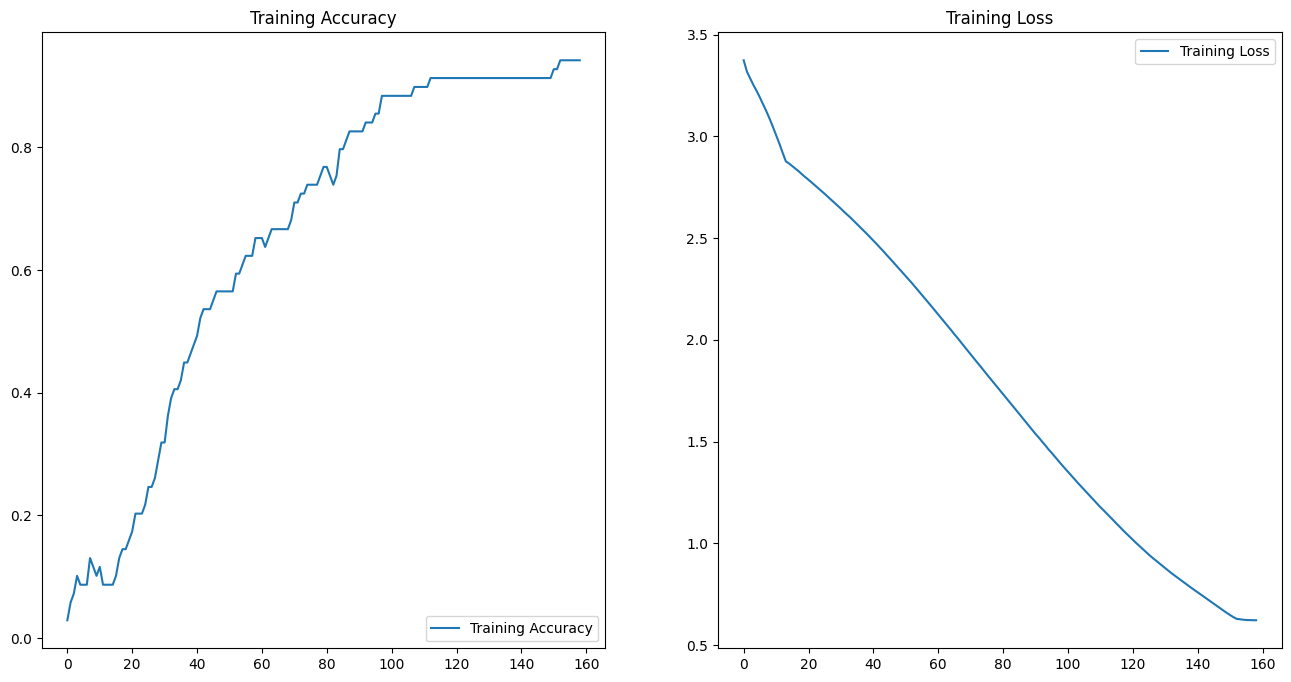

In [52]:
acc = history.history['accuracy']
loss=history.history['loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [53]:
[np.argmax(i) for i in model.predict(X_test)][:10]

1/1 [==============================] - 0s 77ms/step


[19, 1, 9, 9, 8, 5, 9, 28, 9, 9]

In [54]:
[np.argmax(i) for i in y_test][:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## New user question encoding

In [71]:
def get_text():
    input_text  = ['After a while crocodile']
    df_input = pd.DataFrame(list(input_text),columns=['questions'])
    df_input
    return df_input 

In [56]:
#load artifacts 
from tensorflow.keras.models import load_model
model = load_model('model-v1.h5')
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

In [57]:
def tokenizer(entry):
    tokens = entry.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    return tokens

In [58]:
def remove_stop_words_for_input(tokenizer,df,feature):
    doc_without_stopwords = []
    entry = df[feature][0]
    tokens = tokenizer(entry)
    doc_without_stopwords.append(' '.join(tokens))
    df[feature] = doc_without_stopwords
    return df

In [59]:
# df_input = remove_stop_words_for_input(tokenizer,df_input,'questions')
# df_input

In [60]:
def encode_input_text(tokenizer_t,df,feature):
    t = tokenizer_t
    entry = entry = [df[feature][0]]
    encoded = t.texts_to_sequences(entry)
    padded = pad_sequences(encoded, maxlen=29, padding='post')
    return padded

In [61]:
# encoded_input = encode_input_text(tokenizer_t,df_input,'questions')
# encoded_input.shape

In [62]:
# encoded_input

In [63]:
def get_pred(model,encoded_input):
    pred = np.argmax(model.predict(encoded_input))
    return pred

In [64]:
def bot_precausion(df_input,pred):
    words = df_input.questions[0].split()
    if len([w for w in words if w in vocab])==0 :
        pred = 1
    return pred

In [65]:
def get_response(df2,pred):
    upper_bound = df2.groupby('labels').get_group(pred).shape[0]
    r = np.random.randint(0,upper_bound)
    responses = list(df2.groupby('labels').get_group(pred).response)
    return responses[r]
    

In [66]:
def bot_response(response,):
    print(response)

In [72]:
df_input = get_text()

tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

df_input = remove_stop_words_for_input(tokenizer,df_input,'questions')
encoded_input = encode_input_text(tokenizer_t,df_input,'questions')

pred = get_pred(model,encoded_input)
pred = bot_precausion(df_input,pred)

response = get_response(df2,pred)
bot_response(response)

1/1 [==============================] - 0s 14ms/step
See you later aligator


In [ ]:
import streamlit as st